# Basic Usage of Automatic Differentiation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import AD

## Working with Elementary Functions

### Elementary Operations

We can perform basic elementary operations on `AutoDiff` objects, just as we would with numbers. For example, addition, subtraction, multiplication, division, and power operations are all supported. Simply define an instance of the `AutoDiff` class to get started. 

In [2]:
x = AD.AutoDiff(3.0)

In [3]:
# Addition
x + 3.

Function value: 6.0, Derivative value: 1.0

In [4]:
# Subtraction
x - 1.

Function value: 2.0, Derivative value: 1.0

In [5]:
# Multiplication
3.*x

Function value: 9.0, Derivative value: 3.0

In [6]:
# Division
x/3.

Function value: 1.0, Derivative value: 0.3333333333333333

In [7]:
# Power
x**2

Function value: 9.0, Derivative value: 6.0

### Trigonometric Functions, Exponentials, and Logarithms

Other basic elementary operations, such as trigonometric functions, exponentials, and natural logarithms are also supported. Example uses of each of these are shown in the following cells. 

In [8]:
# Sine
AD.sin(x)

Function value: 0.1411200080598672, Derivative value: -0.9899924966004454

In [9]:
# Cosine
AD.cos(x)

Function value: -0.9899924966004454, Derivative value: -0.1411200080598672

In [10]:
# Tangent
AD.tan(x)

Function value: -0.1425465430742778, Derivative value: 1.020319516942427

In [11]:
# Exponential
AD.exp(x**2)

Function value: 8103.083927575384, Derivative value: 48618.50356545231

In [12]:
# Logarithm
AD.log(x)

Function value: 1.0986122886681098, Derivative value: 0.3333333333333333

### Arbitrary Functions

Arbitrary functions can be defined using these elementary operations. For example, suppose we wish to work with the function
\begin{equation}
    f(x) = \exp\left(\sin x^2\right) - x^4. 
\end{equation}
We may define $f(x)$ using the standard Python conventions. However, instead of using the `exp` and `sin` methods from Numpy, we must use the `exp` and `sin` methods defined in the `AD` module because only the latter accept instances of the `AutoDiff` class as inputs. 

In [13]:
# Some arbitrary function
def f(x):
    return AD.exp(AD.sin(x**2)) - x**4

f(x)

Function value: -79.48998665997453, Derivative value: -116.25491309968052

## Application: Newton's Method

Given an equation, $f(x)$, Newton's method allows us to find solutions to $f(x)=0$ iteratively. Starting with an initial guess, $x_0$, we evaluate the function and its derivative at $x_0$. If $|f(x_0)| < \epsilon$, where $\epsilon$ is some tolerance value much less than one, then the iteration stops. Otherwise, the value of the next guess, $x_1$, is obtained as follows.
\begin{equation}
    x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
\end{equation}
Following the same scheme, the $n$-th iteration can be written as 
\begin{equation}
    x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})},
\end{equation}
where $x_{n-1}$ is the guess at the previous iteration.

Since Newton's method makes use of the derivative of the function of interest, we may use automatic differentiation to implement Newton's method! Traditionally, we might consider using the finite difference method to approximate $f'(x)$ or define it explicitly in our routine. There are drawbacks to each of these approaches. The finite difference method is easy to implement, but its accuracy is strongly dependent on choosing the right step size. If $f(x)$ is a simple function, then explicitly defining $f'(x)$ is not a problem. However, this is not always possible. With the `AD` module, there is no need to approximate or explicitly define $f'(x)$. As we operate on our initial guess, $x_0$, the value of the derivative is automatically calculated as well, making it easy to implement Newton's method.

In [14]:
def newton(f, x0, tol=1e-16, max_iter=100):
    """Solves f(x) = 0 using Newton's method.
    
    Args:
    =========
    f (function): Function of interest
    x0 (float): Initial guess
    tol (float): Tolerance value
    max_iter (int): Maximum number of iterations
    
    Returns:
    =========
    xn.val (float): Solution to f(x) = 0 if it exists
                    None if xn.der is zero or if the maximum number of 
                    iterations is reached without satisfying the stopping  
                    criteria
    """
    
    # Initial guess
    xn = x0
    
    for n in range(max_iter):
        
        # Calculate f(xn) and f'(xn) using the AutoDiff class
        fn = f(xn)
        
        # Stop iterating if |f(xn)| is less than the tolerance value and return 
        # the solution, xn
        if abs(fn.val) < tol:
            print(f"Found a solution after {n} iterations.")
            return xn.val
        
        # Check if the derivative is zero
        if fn.der == 0:
            raise ValueError("Encountered zero derivative. No solution.")
            
        # Update guess
        xn = xn - fn.val/fn.der
        
    # Stop iterating if no solution is found within the allowed number of 
    # iterations
    print("Exceeded maximum number of iterations.")
    return None

In [15]:
# Function of interest
def f(x):
    return x**2-x-1

# Initial guess   
x0 = AD.AutoDiff(1.0)

print(f"Solution: {newton(f, x0)}")

Found a solution after 6 iterations.
Solution: 1.618033988749895


## Vectorization: A First Attempt

As written, the `AD` module only supports scalar inputs. However, a hack to produce vector outputs is to build the function and derivative vectors element-wise. This is slow and will need to be addressed in a future implementation, but it works for obtaining first derivatives directly.

In [16]:
# Domain of interest
x1 = np.linspace(-1., 1., 100)

# Store function values
F = []
dF = []

# Calculate function and derivative values using `AutoDiff`
for dx1 in x1:
    F.append(f(AD.AutoDiff(dx1)).val)
    dF.append(f(AD.AutoDiff(dx1)).der)

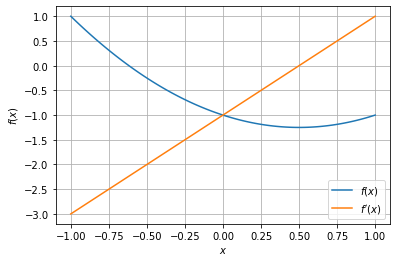

In [17]:
# Plot f(x) and f'(x)
plt.figure()
plt.plot(x1, F, label="$f(x)$")
plt.plot(x1, dF, label="$f'(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid()
plt.show()